<a href="https://colab.research.google.com/github/jhuee/DeepLearning/blob/main/kNN_imple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: k-nearest neighbor (kNN) classifier with sklearn

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist


# load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# 60000 training dataset // 100000 training dataset
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


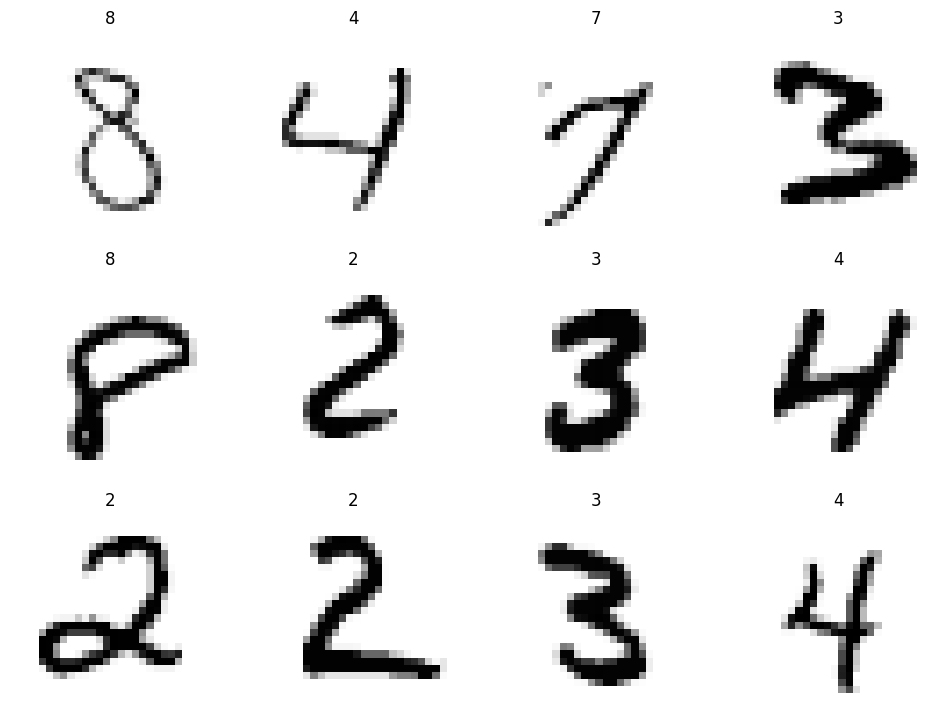

In [2]:
# Display Some of the (training) data
sample_index = np.random.choice(60000, size=12)
num_samples = sample_index.size

random_samples = train_X[sample_index]

plt.figure(figsize=(12, 12))

for k in range(num_samples):
    plt.subplot(4, 4, k + 1)
    plt.imshow(random_samples[k].reshape(28, 28),cmap='Greys')
    plt.title(train_y[sample_index[k]])
    plt.axis('off')


plt.show()

In [4]:
# Prepare dataset for training (reshape)

X_train = train_X.reshape(60000,784).astype(float)
X_test = test_X.reshape(10000,784).astype(float)
y_train = train_y
y_test = test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# kNN with k=5 and L2 norm

In [5]:
# k-NN training with sklearn
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5, p = 2)      # 5-nearest neighbor // L2 norm
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
# Measure the accuracy of the kNN
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, pred))


Accuracy:  0.9688


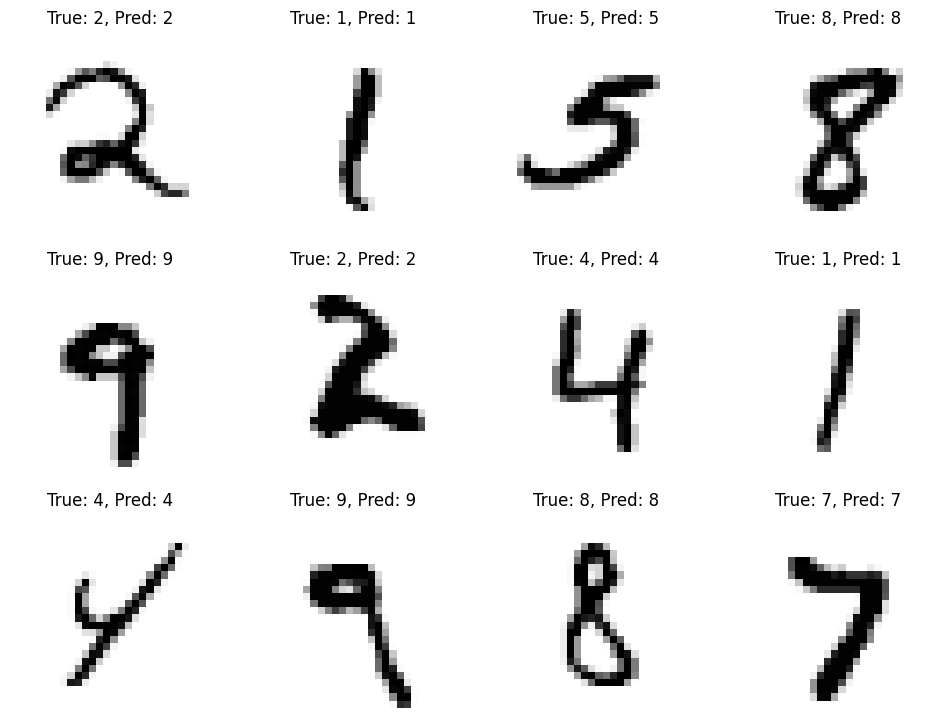

In [7]:
# Display test result (predicted labels and actual label)

sample_index = np.random.choice(10000, size=12)     # take 12 random sample index
num_samples = sample_index.size

random_samples = test_X[sample_index]

plt.figure(figsize=(12, 12))

for k in range(num_samples):
    plt.subplot(4, 4, k + 1)
    plt.imshow(random_samples[k].reshape(28, 28),cmap='Greys')
    plt.title("True: " + str( test_y[sample_index[k]]) + ", Pred: " + str(pred[sample_index[k]]))
    plt.axis('off')


plt.show()

# TODO: Implement k-NN on your own (without sklearn)

In [8]:
# L2 distance
def L2_distance(x, y):
    return np.sqrt( np.sum((x - y)**2, axis=1) )


In [16]:
# Your own K-nearest neighbor
from collections import Counter
def my_kNN(X_train, y_train, X_test, k):
    pred = []  # prediction result
    for dat in X_test:
######### Implement your codes here #########################
        # measure distance between dat and training data
        distance = L2_distance(X_train,dat)

        # find k-minimum values (index)
        k_min = np.argsort(distance)[:k]
        # take the majority vote
        k_nearest_label = [y_train[i] for i in k_min]
        most_common = Counter(k_nearest_label).most_common(1)
        pred.append(most_common[0][0])

    return np.array(pred)




In [17]:
# run your kNN classifier & measure accuracy

# test your code with only 100 test data
num_test = 100
pred = my_kNN(X_train, y_train, X_test[:num_test], 5)
print("Accuracy: ", accuracy_score(y_test[:num_test], pred))



Accuracy:  0.99


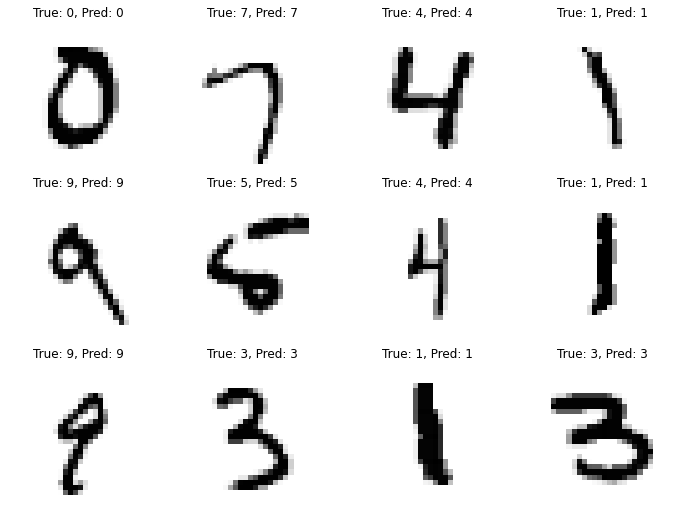

In [ ]:
# Display Some test results


sample_index = np.random.choice(num_test, size=12)     # take 12 random sample index
num_samples = sample_index.size

random_samples = test_X[sample_index]

plt.figure(figsize=(12, 12))

for k in range(num_samples):
    plt.subplot(4, 4, k + 1)
    plt.imshow(random_samples[k].reshape(28, 28),cmap='Greys')
    plt.title("True: " + str( test_y[sample_index[k]]) + ", Pred: " + str(pred[sample_index[k]]))
    plt.axis('off')


plt.show()